In [1]:
import xarray as xr
import dask
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import integrate
#import tqdm
import matplotlib
import datetime
import pickle
import pandas as pd
import itertools
from scipy.stats import t
from scipy.stats import linregress
import statsmodels.api as sm
import scipy.stats as stats
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.8, 3)))
color1=next(colors)

color3=next(colors)
color2=next(colors)
import seaborn as sns
sns.set('paper')

#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)


In [2]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$\mathrm{O}_2$",
    OmegaA="$\Omega_A$",
    T="T"
    # ALK_norm="Normalized Alkalinity",
    # DIC_norm="Normalized DIC",
    # ALK="Alkalinity",
    # DIC="DIC",
)

units = dict(
    O2="mmol m$^{-3}$",
    OmegaA="(non-dimensional)",
    T="$^\circ$C",
    
    # ALK_norm="mmolk m$^{-3}$",
    # DIC_norm="mmolk m$^{-3}$",
    # ALK="mmolk m$^{-3}$",
    # DIC="mmolk m$^{-3}$"
)
color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

In [3]:
df = pd.read_csv ('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/pdo.timeseries.ersstv5.csv')
Time=df.Date.values
PDO=df.PDO.values
TIME = [datetime.datetime.strptime(t0,'%Y-%m-%d') for t0 in Time[1:]] 
print(TIME[12*142-1], TIME[-36], np.shape(Time), np.shape(PDO))
datesPDO=TIME[12*142-1:-36]
dataPDO=PDO[12*142:-36]

1996-01-01 00:00:00 2020-01-01 00:00:00 (2028,) (2028,)


In [4]:
data=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/npgo.txt') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        count=count+1
        if count>30:
            try:
                #print(l2[0])
                year=int(float(l2[0]))
                #print(year)
                if (year >1995) & (year<2020):
                    #print(year)
                    #count=count+1
                    dat=float(l2[2])
                    #print((dat))

                    data.append(dat)
                    #print(data)
            except Exception as ex:
                print('exception', ex)
dataNPGO =np.array(data)
datesNPGO=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M').values

exception could not convert string to float: '</pre>'
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception could not convert string to float: '</body></html>'


/tmp/ipykernel_91579/4062860804.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datesNPGO=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M').values


In [5]:
dataM=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/meiv2.data') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        try:
            #print(l2)
            year=int(l2[0])
            #print(year)
            if (year >1995) & (year<2020):
                #print(year)
                count=count+1
                dat=[float(num) for num in l2[1:]]
                #print(len(dat))
                
                dataM.extend(dat)
        except:
            print('exception', l2)
dataM =np.array(dataM)
datesM=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M')
#print(dates)

exception ['-999.00']
exception ['Multivariate', 'ENSO', 'Index', 'Version', '2', '(MEI.v2)']
exception ['https://www.psl.noaa.gov/enso/mei']
exception ['Row', 'values', 'are', '2', 'month', 'seasons', '(YEAR', 'DJ', 'JF', 'FM', 'MA', 'AM', 'MJ', 'JJ', 'JA', 'AS', 'SO', 'ON', 'ND)']


/tmp/ipykernel_91579/1121452055.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datesM=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M')


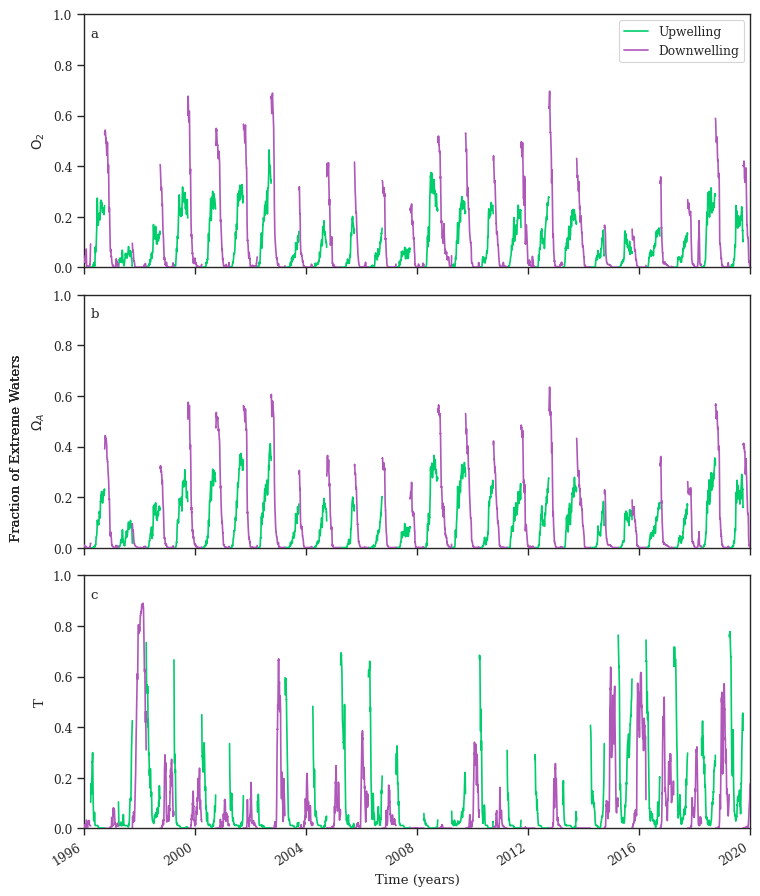

In [6]:
#sns.set('notebook')
sns.set_style('ticks')
at=0.01
bt=0.95
plt.rcParams["font.family"] = "Serif"
num=4
subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(num)+'_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
                
    if idx==0:
        plt.legend()
    #plt.grid(axis='x')

            
    #if idx==2:
    #    pass
    #else:
    #    ax2 = ax.twinx()
    #    ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
    #    ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        ##ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
    #    ax2.set_ylabel(r'NPGO')
    ax.set_ylabel(f'{long_names[var]}')

    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,1])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    plt.tight_layout()
plt.savefig('../Figures/cluster_'+str(num)+'_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

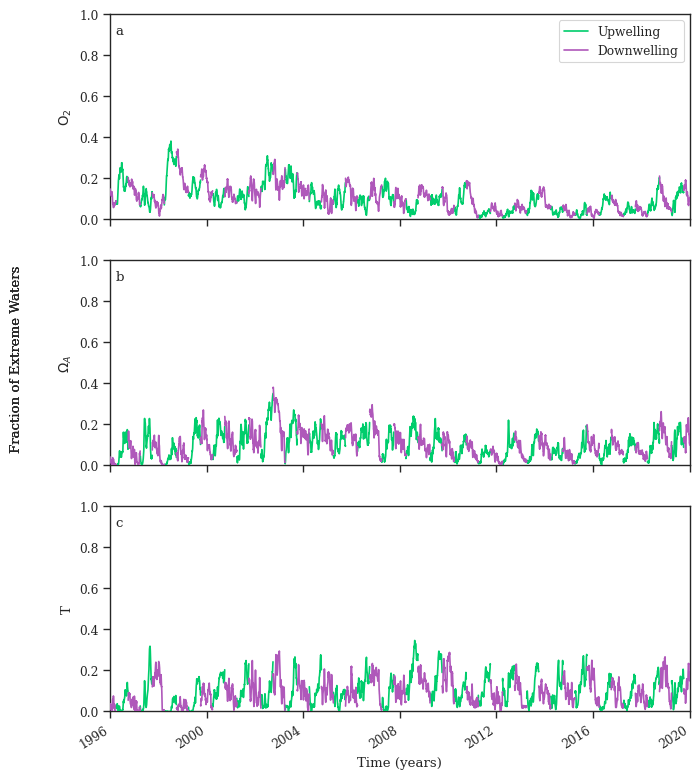

In [7]:
at=0.01
bt=0.95

#subpanel=['A', 'B', 'C', 'D', 'E']
mcolors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_2_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=mcolors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()
        
    #ax2 = ax.twinx()
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
    #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
    ax.set_ylabel(f'{long_names[var]}')
    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,1])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
#plt.savefig('../Figures/Shallows_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)

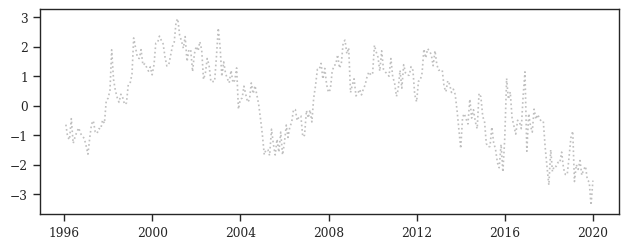

In [8]:
fig = plt.figure(**figprops)

figprops = dict(figsize=(Wf,Hf))
ax = fig.add_subplot(3,1,idx+1)

ax.plot( datesNPGO,dataNPGO, color='0.5', alpha=0.5, linestyle=':')

## Compound Extremes

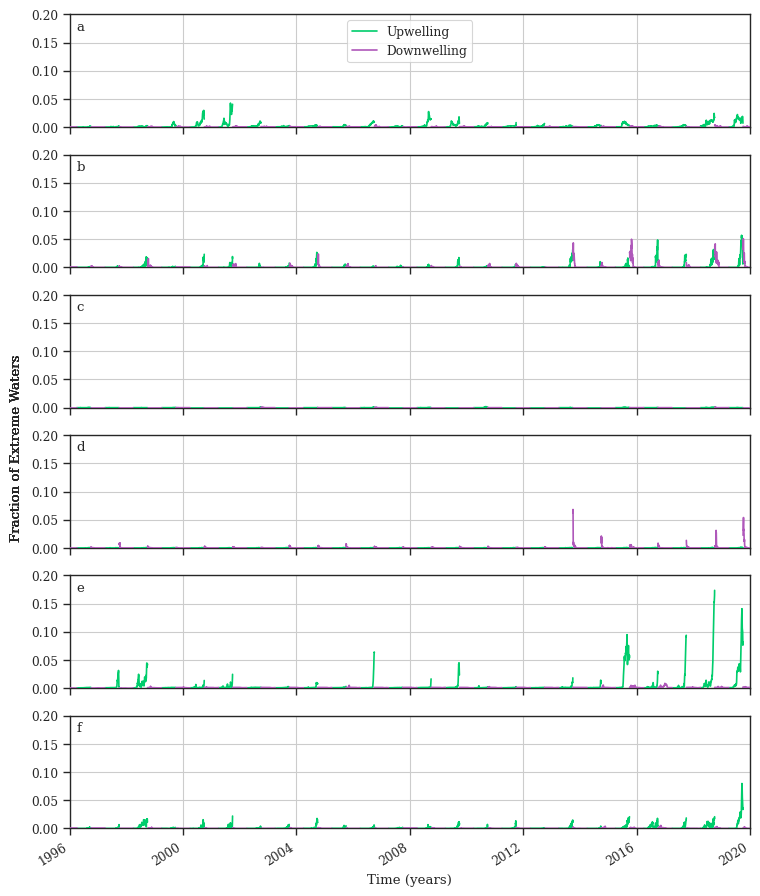

In [9]:

at=0.01
bt=0.95

dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T and $\mathrm{O}_2$ and $\Omega_A$']


#long_names0 = list(itertools.combinations(long_names, 2))


subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
idx=3
for cluster_id in np.arange(6):
    var=dual_extreme[3]
    ax = fig.add_subplot(6,1,cluster_id+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(cluster_id)+'_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if cluster_id==0:
        plt.legend(loc='upper center')

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    #ax.set_ylabel( labelnames[idx] )

    if cluster_id==5:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]]) 
    ax.set_ylim([0,0.2])
    ax.text(at, bt, subpanel[cluster_id], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    plt.grid('on')

    plt.tight_layout()
plt.savefig('../Figures/AllClusters_Triple_Compound_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

In [10]:



at=0.01
bt=0.95

dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T and $\mathrm{O}_2$ and $\Omega_A$']


#long_names0 = list(itertools.combinations(long_names, 2))


subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
idx=3
for cluster_id in np.arange(0):
    var=dual_extreme[3]
    ax = fig.add_subplot(6,1,cluster_id+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(cluster_id)+'_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    #color=colors[idx]
    merged_da = xr.merge([dwn,upw])
    #print(merged_da.time, merged_da)
    X=merged_da.time.values
    Y=merged_da['var'].values
    print('X,Y',X, Y)
    XX=[X.astype('datetime64[s]').astype('int') for x in X]
    # Fit the model
    correlation, p_value = stats.spearmanr(XX, Y)
    print(f"Spearman correlation: {correlation}, p-value: {p_value}")

    #model = sm.OLS(Y, XX)
    #results = model.fit()
    #print(results.summary())
    if cluster_id==0:
        plt.legend(loc='upper center')

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    #ax.set_ylabel( labelnames[idx] )

    if cluster_id==5:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]]) 
    ax.set_ylim([0,0.2])
    ax.text(at, bt, subpanel[cluster_id], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    plt.grid('on')

    plt.tight_layout()
#plt.savefig('../Figures/AllClusters_Triple_Compound_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

<Figure size 748.031x905.512 with 0 Axes>

To adjust for autocorrelation, we will use the method of Bretherton et al 1999. 

In [12]:
def bretherton_adjustment(y):
    r1 = np.corrcoef(y[:-1], y[1:])[0, 1]
    Nt = len(y)
    Ne = Nt * (1 - r1) / (1 + r1)
    return Ne, r1

# Usage
#Ne, r1 = bretherton_adjustment(y)
#print(f"Effective Sample Size: {Ne}")

There is an apparent linear trend in some of the triple extremes. Here, I test for significance. 



-------------------------------------------------------------
testing for a linear trend in cluster = 0
Spearman correlation: 0.26355011184895494, p-value: 3.2267307062161558e-139
Kendall's tau: 0.18686265598722235
P-value: 4.5152950480393786e-138
The trend is significant according to the Mann-Kendall test!!
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           4.26e-24
Time:                        03:26:06   Log-Likelihood:                 37052.
No. Observations:                8766   AIC:                        -7.410e+04
Df Residuals:                    8764   BIC:                        -7.409e+04
Df Model:                           1                     

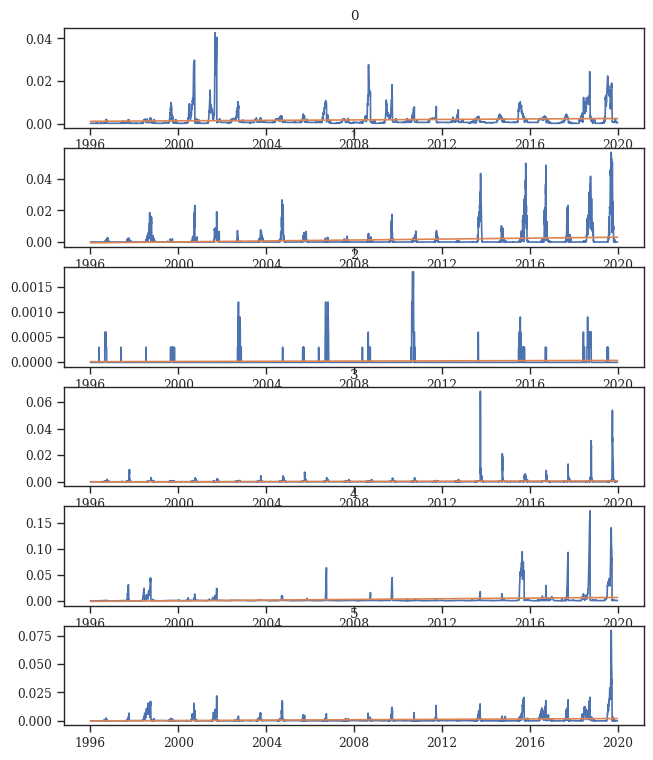

In [13]:

#import pymannkendall as mk
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for cluster_id in np.arange(6):
    var=dual_extreme[3]
    ax = fig.add_subplot(6,1,cluster_id+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(cluster_id)+'_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    #color=colors[idx]
    merged_da = xr.merge([dwn,upw])
    #print(merged_da.time, merged_da)
    X=merged_da.time.values
    Y=merged_da['var'].values
    #print('X,Y',X, Y)
    plt.plot(X,Y)
    XX=[x.astype('datetime64[s]').astype('int') for x in X]
    print('-------------------------------------------------------------')

    print('testing for a linear trend in cluster =', cluster_id)
    correlation, p_value = stats.spearmanr(XX, Y)
    print(f"Spearman correlation: {correlation}, p-value: {p_value}")
    # Mann-Kendall Trend Test
    tau, p_value = stats.kendalltau(XX, Y)

    print(f"Kendall's tau: {tau}")
    print(f"P-value: {p_value}")
    if p_value<0.05:
        print('The trend is significant according to the Mann-Kendall test!!')

    # Add a constant (intercept) to the model
    XX_WC = sm.add_constant(XX)
    model = sm.OLS(Y, XX_WC)
    results = model.fit()
    # Get the fitted values (predicted y-values)
    y_pred = results.predict(XX_WC)
    #result = mk.test(Y)
    print(results.summary())
   # print('t_test', results.t_test([1, 0]))
    
    slope, intercept, r_value, p_value, std_err = linregress(XX,Y)
    print(f"Slope: { 3600.*24*365*slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    if p_value<0.05:
        print('The trend is significant according to the t-test')
    plt.plot(X,y_pred)
    plt.title(str(cluster_id))

With small va;lues of the Durbin Watson tes 0<coeff<2, we can assume that there is autopcorrelation in the data which may invalidate OLS results. But the spearman correlation gives a small positive value with low p_values for all clusters. Similarly, the p_value for the slope oof the linear regression is less than 0.05 indicating a significant trend. 